In [10]:
# import necessary packages
import numpy as np
from numpy import pi, sin, cos, sqrt, absolute, arcsin, arccos, arctan, sign
import matplotlib.pyplot as plt

%matplotlib inline
from matplotlib import animation, rc
from IPython.display import HTML
print(animation.writers.list())

['ffmpeg', 'ffmpeg_file', 'html']


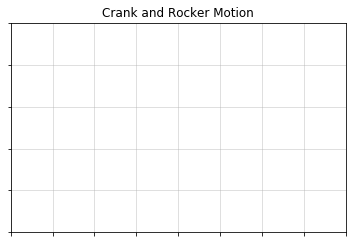

In [11]:


# input parameters
r = 0.395  # crank radius
l = 4.27  # connecting rod length
rr = 1.15;  # rocker radius
d = 4.03  # center-to-center distance
rot_num = 6  # number of crank rotations
increment = 0.1  # angle incremement
over = 1  # if over = 1 --> mechanism is on top, If over = -1, mechanism on bottom
s = over / absolute(over)

# create the angle array, where the last angle is the number of rotations*2*pi
angle_minus_last = np.arange(0, rot_num * 2 * pi, increment)
R_Angles = np.append(angle_minus_last, rot_num * 2 * pi)

# coordinates of the crank center point : Point 1
x1 = 0;
y1 = 0;

# Coordinates of the rocker center point: Point 4
x4 = d
y4 = 0

X2 = np.zeros(len(R_Angles))  # array of crank x-positions: Point 2
Y2 = np.zeros(len(R_Angles))  # array of crank y-positions: Point 2
RR_Angle = np.zeros(len(R_Angles))  # array of rocker arm angles
X3 = np.zeros(len(R_Angles))  # array of rocker x-positions: Point 3
Y3 = np.zeros(len(R_Angles))  # array of rocker y-positions: Point 3

# find the crank and connecting rod positions for each angle
for index, R_Angle in enumerate(R_Angles, start=0):
    theta1 = R_Angle
    x2 = r * cos(theta1)  # x-cooridnate of the crank: Point 2
    y2 = r * sin(theta1)  # y-cooridnate of the crank: Point 2
    e = sqrt((x2 - d) ** 2 + (y2 ** 2))
    phi2 = arccos((e ** 2 + rr ** 2 - l ** 2) / (2 * e * rr))
    phi1 = arctan(y2 / (x2 - d)) + (1 - sign(x2 - d)) * pi / 2
    theta3 = phi1 - s * phi2
    RR_Angle[index] = theta3
    x3 = rr * cos(theta3) + d;  # x cooridnate of the rocker moving point: Point 3
    y3 = rr * sin(theta3);  # y cooridnate of the rocker moving point: Point 3

    theta2 = arctan((y3 - y2) / (x3 - x2)) + (1 - sign(x3 - x2)) * pi / 2;

    X2[index] = x2  # grab the crankshaft x-position
    Y2[index] = y2  # grab the crankshaft y-position
    X3[index] = x3  # grab the connecting rod x-position
    Y3[index] = y3  # grab the connecting rod y-position

# set up the figure and subplot
fig = plt.figure()
ax = fig.add_subplot(111, aspect='equal', autoscale_on=False, xlim=(-2, 6), ylim=(-2, 3))

# add grid lines, title and take out the axis tick labels
ax.grid(alpha=0.5)
ax.set_title('Crank and Rocker Motion')
ax.set_xticklabels([])
ax.set_yticklabels([])
line, = ax.plot([], [], 'o-', lw=5, color='#2b8cbe')  # color from: http://colorbrewer2.org/


# initialization function
def init():
    line.set_data([], [])
    return line,


# animation function
def animate(i):
    x_points = [x1, X2[i], X3[i], x4]
    y_points = [y1, Y2[i], Y3[i], y4]

    line.set_data(x_points, y_points)
    return line,


# call the animation
ani = animation.FuncAnimation(fig, animate, init_func=init, frames=len(X2), interval=40, blit=True, repeat=False)
## to save animation, uncomment the line below. Ensure ffmpeg is installed:
## ani.save('crank_and_rocker_motion_animation.mp4', fps=30, extra_args=['-vcodec', 'libx264'])

# show the animation
#plt.show()


In [12]:
HTML(ani.to_html5_video())

In [13]:
# equivalent to rcParams['animation.html'] = 'html5'
rc('animation', html='html5')
ani